# Домашнее задание 2

Проведите анализ датасета с использованием логистической регрессии.

Требования:
1. Метрики оценки моделей:
- Для логистической регрессии: Accuracy, Precision, Recall, F1-Score, ROC-AUC.

2. Логистическая регрессия (для датасета Titanic):
- Проведите предобработку данных.
- Обучите модель логистической регрессии и оцените её качество.
- Визуализируйте результаты и постройте ROC-кривую.

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


data_1 = sns.load_dataset("titanic")  # Загружаем датасет
data_1.head(5)  # Смотрим первые пять строк и названия столбцов

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
data_1.isnull().sum()  # Смотрим, в каких столбцах не хватает данных

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [3]:
# Заполним пропуски в столбце "age" медианными значениями и сохраним данные в новом столбце "age_median"

'''Исключаем из работы часть столбцов.
Столбец "embarked" содержит первую букву из названия городов с портами, где сели пассажиры. Эти же данные уже есть
в столбце "embark_town".
Столбец "class" содержит категориальные данные, которые по сути, дублируются в столбеце "pclass", в уже нужном нам виде.
Столбец "deck" ("палуба") исключаем, т.к. отсутствует большая часть данных и заполнить пробелы каким-либо способом
не возможно.
Столбец "alive", т.к. он по сути дублирует столбец "survived"'''

data_1['age_median'] = data_1['age'].fillna(data_1['age'].median())
data_1.drop(['age', 'embarked', 'class', 'deck', 'alive'], axis = 1 , inplace = True)
data_1

,survived,pclass,sex,sibsp,parch,fare,who,adult_male,embark_town,alone,age_median
0,0,3,male,1,0,7.2500,man,True,Southampton,False,22.0
1,1,1,female,1,0,71.2833,woman,False,Cherbourg,False,38.0
2,1,3,female,0,0,7.9250,woman,False,Southampton,True,26.0
3,1,1,female,1,0,53.1000,woman,False,Southampton,False,35.0
4,0,3,male,0,0,8.0500,man,True,Southampton,True,35.0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,man,True,Southampton,True,27.0
887,1,1,female,0,0,30.0000,woman,False,Southampton,True,19.0
888,0,3,female,1,2,23.4500,woman,False,Southampton,False,28.0
889,1,1,male,0,0,30.0000,man,True,Cherbourg,True,26.0


In [4]:
# Заполняем две пустые ячейки в столбце "embark_town", значениями с предыдущих строк

data_1['embark_town'] = data_1['embark_town'].ffill()

In [5]:
# Проверяем, что в столбце "embark_town" действительно произошла замена отсутствующих данных на требуемые значения

cat_list = data_1.select_dtypes(include='object').columns.to_list()  # Выбираем столбцы с типом данных object"

new_cat = [i for i in cat_list if not (i == 'sex' or i == 'who')]  # Исключаем не нужные столбцы

# Собираем уникальные значения в столбце и выводим
great_list = []
for i in new_cat:
  new_list = data_1[i].unique()
  great_list.append(new_list)

great_list

[array(['Southampton', 'Cherbourg', 'Queenstown'], dtype=object)]

In [6]:
data_1.isnull().sum()  # Все данные теперь есть

survived       0
pclass         0
sex            0
sibsp          0
parch          0
fare           0
who            0
adult_male     0
embark_town    0
alone          0
age_median     0
dtype: int64

In [7]:
data_1.info()  # Смотрим информацию по типам данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   sibsp        891 non-null    int64  
 4   parch        891 non-null    int64  
 5   fare         891 non-null    float64
 6   who          891 non-null    object 
 7   adult_male   891 non-null    bool   
 8   embark_town  891 non-null    object 
 9   alone        891 non-null    bool   
 10  age_median   891 non-null    float64
dtypes: bool(2), float64(2), int64(4), object(3)
memory usage: 64.5+ KB


In [8]:
# Переводим все объектные данные в дамми-переменные

# new_df = pd.get_dummies(data_1, columns = ['sex', 'who', 'embark_town'], drop_first = True)
new_df = pd.get_dummies(data_1, columns = ['sex', 'who', 'embark_town'])  # Разница в скорах с закомментированным выше вариантом, крайне мала
new_df.head()

,survived,pclass,sibsp,parch,fare,adult_male,alone,age_median,sex_female,sex_male,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,3,1,0,7.2500,True,False,22.0,False,True,False,True,False,False,False,True
1,1,1,1,0,71.2833,False,False,38.0,True,False,False,False,True,True,False,False
2,1,3,0,0,7.9250,False,True,26.0,True,False,False,False,True,False,False,True
3,1,1,1,0,53.1000,False,False,35.0,True,False,False,False,True,False,False,True
4,0,3,0,0,8.0500,True,True,35.0,False,True,False,True,False,False,False,True


In [9]:
new_df.info()  # Смотрим информацию по типам данных - остались только int64, float64 и bool

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 891 non-null    int64  
 1   pclass                   891 non-null    int64  
 2   sibsp                    891 non-null    int64  
 3   parch                    891 non-null    int64  
 4   fare                     891 non-null    float64
 5   adult_male               891 non-null    bool   
 6   alone                    891 non-null    bool   
 7   age_median               891 non-null    float64
 8   sex_female               891 non-null    bool   
 9   sex_male                 891 non-null    bool   
 10  who_child                891 non-null    bool   
 11  who_man                  891 non-null    bool   
 12  who_woman                891 non-null    bool   
 13  embark_town_Cherbourg    891 non-null    bool   
 14  embark_town_Queenstown   8

In [10]:
# Масштабирование числовых признаков

scaler = StandardScaler()
new_df[['pclass', 'sibsp', 'parch', 'fare', 'age_median']] = scaler.fit_transform(new_df[['pclass', 'sibsp', 'parch', 'fare', 'age_median']])
# new_df[['fare', 'age_median']] = scaler.fit_transform(new_df[['fare', 'age_median']])  # Можно и менее глобально масштабировать, но от этого скоры становятся чуть меньше

new_df.head()

,survived,pclass,sibsp,parch,fare,adult_male,alone,age_median,sex_female,sex_male,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,0.827377,0.432793,-0.473674,-0.502445,True,False,-0.565736,False,True,False,True,False,False,False,True
1,1,-1.566107,0.432793,-0.473674,0.786845,False,False,0.663861,True,False,False,False,True,True,False,False
2,1,0.827377,-0.474545,-0.473674,-0.488854,False,True,-0.258337,True,False,False,False,True,False,False,True
3,1,-1.566107,0.432793,-0.473674,0.420730,False,False,0.433312,True,False,False,False,True,False,False,True
4,0,0.827377,-0.474545,-0.473674,-0.486337,True,True,0.433312,False,True,False,True,False,False,False,True


In [11]:
# Отделение признаков от целевой переменной
X = new_df.drop(columns = ['survived'])
y = new_df['survived']

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [12]:
# Обучение модели логистической регрессии

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [13]:
# Предсказания

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [14]:
# Оценка модели

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

In [15]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')

Accuracy: 0.8171641791044776
Precision: 0.803921568627451
Recall: 0.7387387387387387
F1 Score: 0.7699530516431925
ROC AUC: 0.8830550295518448


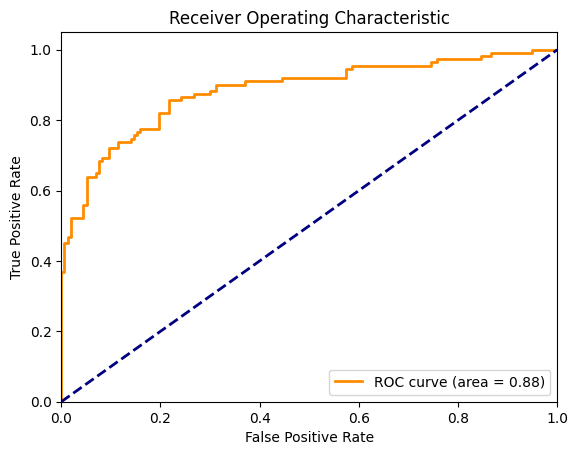

In [16]:
# Построение ROC-кривой

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = "lower right")
plt.show()